<a href="https://colab.research.google.com/github/AdharshReddyC/Netflix_CaseStudy/blob/main/Netflix_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Netflix is looking to use data analysis to enhance content creation and expand its global footprint. By studying TV shows and movies data, the focus is on recognizing audience preferences, production trends, and strategic opportunities for growth in diverse markets.**


In [ ]:
import numpy as np #importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('netflix.csv') #loading the dataset

In [ ]:
df.head() #To show the first 5 rows of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_new,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,2021
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2.0,2021
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2.0,2021
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2.0,2021
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2.0,2021


In [ ]:
df.info() #to get info of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   show_id       201991 non-null  object 
 1   type          201991 non-null  object 
 2   title         201991 non-null  object 
 3   director      201991 non-null  object 
 4   cast          201991 non-null  object 
 5   country       201991 non-null  object 
 6   date_added    201991 non-null  object 
 7   release_year  201991 non-null  int64  
 8   rating        201924 non-null  object 
 9   duration      201991 non-null  object 
 10  listed_in     201991 non-null  object 
 11  description   201991 non-null  object 
 12  duration_new  201991 non-null  float64
 13  year_added    201991 non-null  int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 23.1+ MB


In [ ]:
df.shape #The number of rows and columns in the dataset.

(8807, 12)

In [ ]:
df.isna().sum() #To get the missing values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df['release_year'].agg(['min', 'max']) #To get max and min release year

min    1925
max    2021
Name: release_year, dtype: int64

In [ ]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

**Upon reviewing the provided dataset:**

- The dataset comprises 12 columns and 8807 rows. Most data is in categorical format, except for the 'release_year' column.
- To facilitate comprehensive analysis based on temporal aspects, the 'date_added' column should be converted into a standardized date format. This conversion will enable insights into the temporal distribution of content additions across months and years.
- Nested data is present within the 'cast' and 'listed_in' columns, necessitating an unnesting process to extract individual insights for each actor and genre.
- The 'duration' column contains alphanumeric values representing the duration of movies and series. Extracting numeric data from this column through a space-based split operation will allow for an in-depth analysis of content duration characteristics.
- The dataset exhibits varying degrees of missing values across columns, notably with 'director' (2634 missing), 'cast' (825 missing), 'country' (831 missing), 'date_added' (10 missing), 'rating' (4 missing), and 'duration' (3 missing) columns.
- The dataset encompasses movies and series spanning from the year 1925 to the most recent entries in 2021.
- Netflix has more Movies than TV Show's with 6131, 2676 respectively


#**Data Cleansing Operations**


**i. Dealing with missing values:**

 - We will fill the  missing values in specific columns with the most frequent value (mode) to ensure data completeness and uniformity

In [ ]:
df['director'].fillna(df['director'].mode()[0],inplace=True)
df['cast'].fillna(df['cast'].mode()[0],inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0],inplace=True)
df['duration'].fillna(df['duration'].mode()[0],inplace=True)


**ii. Converting date_added column into a date datatype:**

 - We will convert the date_added column into date format using to_datetime function

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added']) # Convert the 'date_added' column to datetime format
df['date_added'] = df['date_added'].dt.date  # Extract the date part and keep only the date (remove time information)

**iii. Extracting numeric part from the duration column**





In [ ]:
# Splitting the 'duration' column by space and keeping only the first part (numeric)
df['duration_new'] = df['duration'].str.split(" ").str[0].astype(float)

**iv) Unnesting Nested Values in DataFrame Columns**

- We used Pandas' `explode()` method to expand nested values within specific columns in the 'data' DataFrame.
- Columns like 'listed_in', 'country', 'cast', and 'director' initially had multiple values separated by commas.
- By splitting these values and applying `explode()`, each item within these columns now occupies its own row.
- This transformation allows for easier analysis and exploration of individual elements within these previously nested columns.


In [ ]:
# Unnesting 'listed_in' column in the original DataFrame
df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in')

# Unnesting 'country' column in the original DataFrame
df['country'] = df['country'].str.split(', ')
df = df.explode('country')

# Unnesting 'cast' column in the original DataFrame
df['cast'] = df['cast'].str.split(', ')
df = df.explode('cast')

# Unnesting 'director' column in the original DataFrame
df['director'] = df['director'].str.split(', ')
df = df.explode('director')


#**Top 5's**



**Top 5 actors**


> David Attenborough appeared is the most appeared actor with 845 movies/series

>

> **Note :** The figure might not be approriate as we have replaced the missing valus with the mode of the columns








In [ ]:
# Grouping by 'Cast' and counting unique titles, then resetting the index to create a new DataFrame
new_df = df.groupby('cast')['title'].nunique().reset_index()

# Sorting the DataFrame in descending order based on the 'title' column
sorted_df = new_df.sort_values(by='title', ascending=False)

# Selecting the top 5 records with the most unique titles
top_5_actors = sorted_df.head(5)

top_5_actors


,cast,title
7832,David Attenborough,845
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
32591,Takahiro Sakurai,32


**Top 5 directors**


> Rajiv Chilaka is the most popular director with 2656 movies/series


> **Note :** The figure might not be approriate as we have replaced the missing valus with the mode of the columns







In [ ]:
# Grouping by 'director' and counting unique titles, then resetting the index to create a new DataFrame
new_df = df.groupby('director')['title'].nunique().reset_index()

# Sorting the DataFrame in descending order based on the 'title' column
sorted_df = new_df.sort_values(by='title', ascending=False)

# Selecting the top 5 records with the most unique titles
top_5_directors = sorted_df.head(5)

top_5_directors


,director,title
3749,Rajiv Chilaka,2656
1906,Jan Suter,21
3800,Raúl Campos,19
4457,Suhas Kadav,16
2866,Marcus Raboy,16


**Top 5 Genre**


> Drama is the most frequent *genre*


> **Note :** The figure might not be approriate as we have replaced the missing valus with the mode of the columns


In [ ]:
# Grouping by 'listed_in' and counting unique titles, then resetting the index to create a new DataFrame
new_df = df.groupby('listed_in')['title'].nunique().reset_index()

# Sorting the DataFrame in descending order based on the 'title' column
sorted_df = new_df.sort_values(by='title', ascending=False)

# Selecting the top 5 records with the most unique titles
top_5_genere = sorted_df.head(5)

top_5_genere


,listed_in,title
16,International Movies,2752
12,Dramas,2427
7,Comedies,1674
17,International TV Shows,1351
10,Documentaries,869


#Analysis of Number of Titles Realeased Over The Years

This histogram displays the distribution of unique release years per title in the Netflix dataset. It visualizes the diversity in release years associated with different titles available on Netflix.

Each bar represents the frequency of titles based on the count of distinct release years they encompass. The goal is to identify patterns in release timelines among shows and movies, offering insights into the variety or consistency of release years across titles.


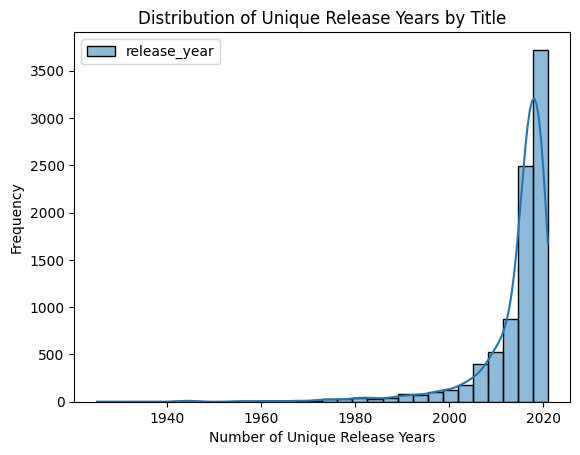

In [ ]:
# Grouping the DataFrame by 'title' and extracting unique release years for each title, then exploding them into separate rows
release_years_by_title = df.groupby('title')['release_year'].unique().explode().reset_index()

# Plotting a histogram to show the distribution of unique release years per title
sns.histplot(release_years_by_title, bins=30, kde=True)  # Creating a histogram plot
plt.xlabel('Number of Unique Release Years')  # Labeling the x-axis
plt.ylabel('Frequency')  # Labeling the y-axis
plt.title('Distribution of Unique Release Years by Title')  # Adding a title to the plot
plt.show()  # Displaying the plot


### TV Ratings Distribution by Title

The code groups the data by 'title', extracts unique TV ratings per title, and expands them for individual ratings. It then creates a countplot to display the distribution of TV ratings across titles. Adjustments are made for better visualization.


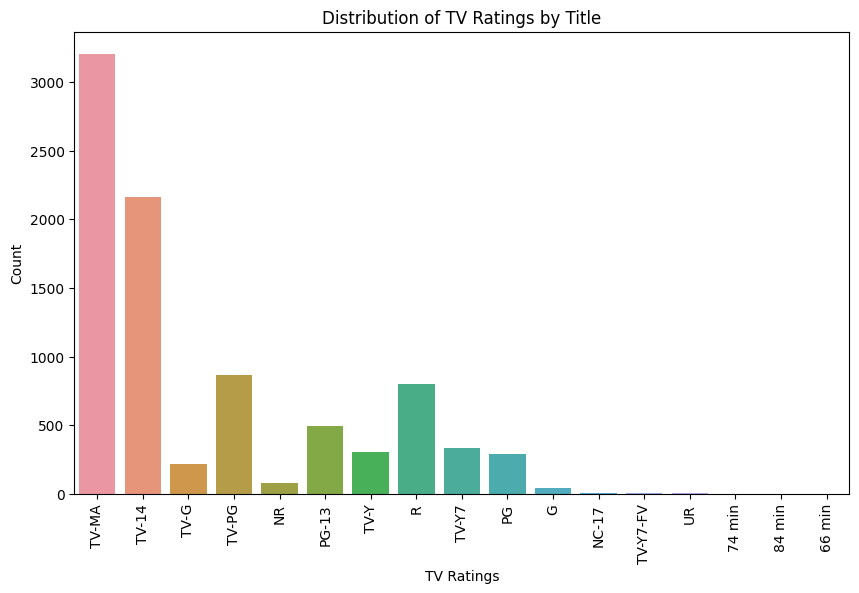

In [ ]:
# Grouping the DataFrame by 'title' and extracting unique ratings for each title, then exploding them into separate rows
ratings_by_title = df.groupby('title')['rating'].unique().explode().reset_index()

# Plotting a countplot to show the distribution of different TV ratings per title
plt.figure(figsize=(10, 6))  # Adjusting figure size for better visualization
sns.countplot(data=ratings_by_title, x='rating')
plt.xlabel('TV Ratings')
plt.ylabel('Count')
plt.title('Distribution of TV Ratings by Title')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()


### Top 20 Countries' Content Distribution

The code shows how content is distributed across the top twenty countries based on the number of productions. It uses a countplot to display this distribution, focusing on the most prevalent countries.


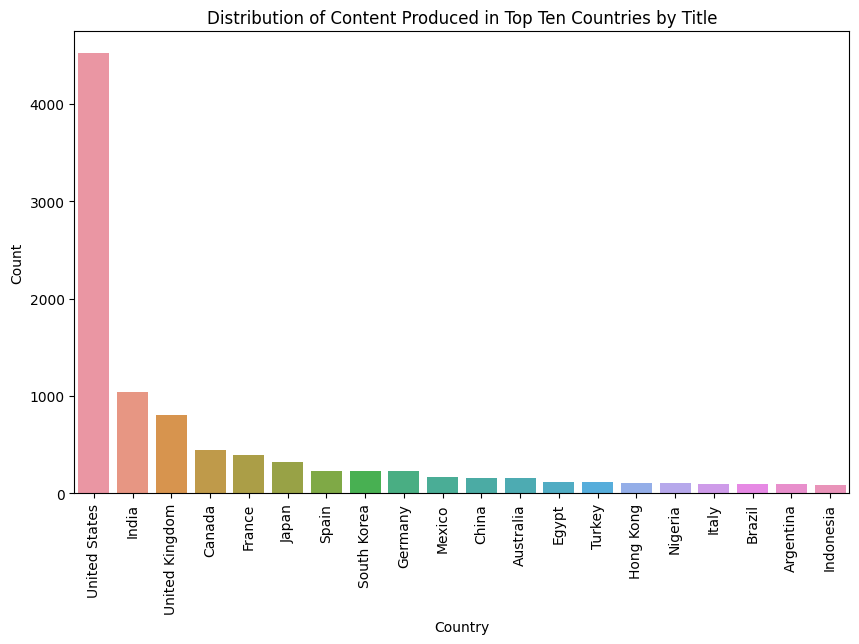

In [ ]:

# Grouping the DataFrame by 'title' and extracting unique countries for each title, then exploding them into separate rows
countries_by_title = df.groupby('title')['country'].unique().explode().reset_index()

# Get the ten most frequent countries
top_ten_countries = countries_by_title['country'].value_counts().head(20).index

# Filtering the DataFrame to include only the top ten countries
countries_top_ten = countries_by_title[countries_by_title['country'].isin(top_ten_countries)]

# Plotting a countplot to show the distribution of content produced in different countries per title
plt.figure(figsize=(10, 6))  # Adjusting figure size for better visualization
sns.countplot(data=countries_top_ten, x='country', order=top_ten_countries)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Content Produced in Top Ten Countries by Title')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()


### Movie and TV Show Counts per Year

The code separates the dataset into movies and TV shows, focusing on years after 2000. It calculates the count of unique movie and TV show titles for each year.

Using a scatter plot, it visually compares the counts of unique movie and TV show titles per year. Each data point represents the count of titles for respective years, distinguishing between movies and TV shows.


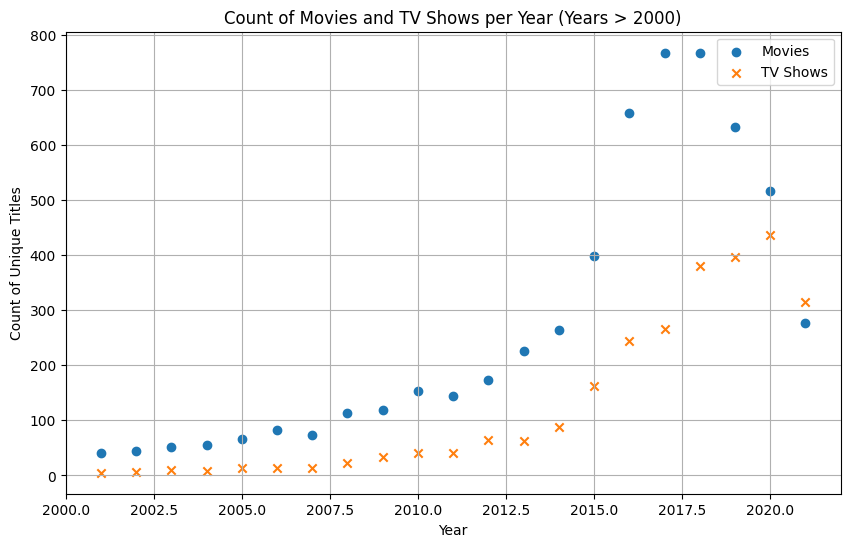

In [ ]:
# Filter the DataFrame for movies and TV shows separately and for years greater than 2000
movies = df[(df['type'] == 'Movie') & (df['release_year'] > 2000)]
tv_shows = df[(df['type'] == 'TV Show') & (df['release_year'] > 2000)]

# Calculate the count of unique movie titles per year
movie_count_per_year = movies.groupby('release_year')['title'].nunique()

# Calculate the count of unique TV show titles per year
tv_show_count_per_year = tv_shows.groupby('release_year')['title'].nunique()

# Plotting a scatter plot for movie and TV show counts per year
plt.figure(figsize=(10, 6))
plt.scatter(movie_count_per_year.index, movie_count_per_year.values, label='Movies', marker='o')
plt.scatter(tv_show_count_per_year.index, tv_show_count_per_year.values, label='TV Shows', marker='x')
plt.xlabel('Year')
plt.ylabel('Count of Unique Titles')
plt.title('Count of Movies and TV Shows per Year (Years > 2000)')
plt.legend()
plt.grid(True)
plt.show()


### Movie and TV Show Duration Distribution

The code creates side-by-side subplots to display the distribution of durations for movies and TV shows separately.

The left subplot depicts the duration distribution for movies using a boxplot, while the right subplot presents the duration distribution for TV shows. Each subplot visualizes the spread of durations within its respective category.


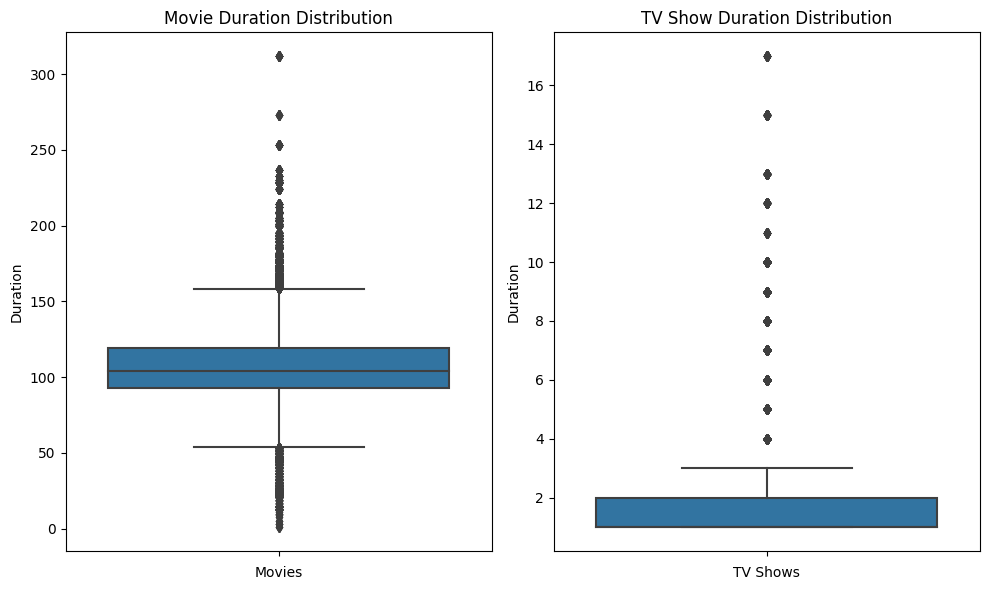

In [ ]:
# Creating subplots for movies and TV shows
plt.figure(figsize=(10, 6))

# Subplot for Movie Duration Distribution
plt.subplot(1, 2, 1)
sns.boxplot(data=df[df['type'] == 'Movie'], y='duration_new')
plt.title('Movie Duration Distribution')
plt.xlabel('Movies')
plt.ylabel('Duration')

# Subplot for TV Show Duration Distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=df[df['type'] == 'TV Show'], y='duration_new')
plt.title('TV Show Duration Distribution')
plt.xlabel('TV Shows')
plt.ylabel('Duration')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### Correlation Heatmap for Key Features

This code snippet begins by converting the 'date_added' column to extract the year and creating a new 'year_added' column. Then, it selects specific columns ('release_year', 'duration_new', 'year_added') to form a new DataFrame.

The code calculates the correlation matrix for these selected columns and displays it as a heatmap. The heatmap visually represents the correlation strength between the release year, duration, and year added, providing insights into their relationships.


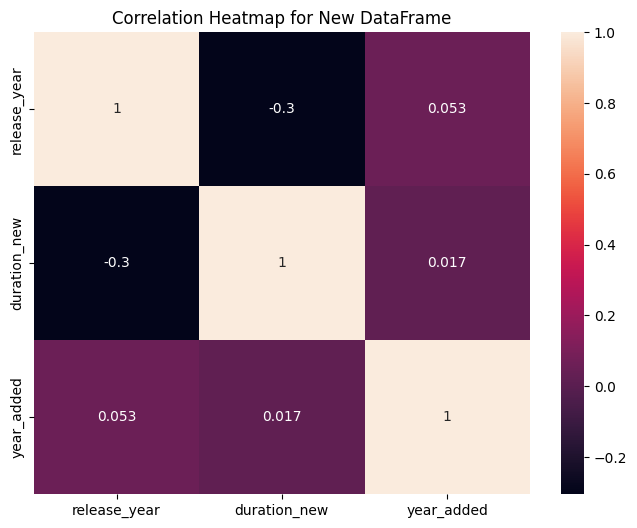

In [ ]:
df['year_added'] = pd.to_datetime(df['date_added']).dt.year

# Creating a new DataFrame with the desired columns
new_df = df[['release_year', 'duration_new', 'year_added']]
# Calculating the correlation matrix for the new DataFrame
correlation_matrix = new_df.corr()

# Plotting a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cbar=True)
plt.title('Correlation Heatmap for New DataFrame')
plt.show()


### Trend of duration to Year released



<Axes: xlabel='release_year', ylabel='duration_new'>

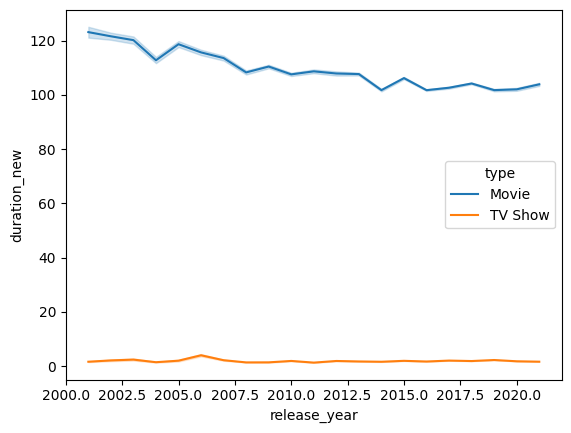

In [ ]:
sns.lineplot(x='release_year', y='duration_new', hue='type', data=df[df['release_year']>2000])

**Conclusion**

## ***Business Insights***

**Content Distribution Trend:** The dataset showcases a significant increase in the number of titles released annually, especially from the 1990s to 2020, indicating a continuous upward trend. However, there might be a slight decline in recent years, suggesting a potential saturation point or shift in consumer preferences.

**Netflix Content Composition:** Netflix holds a higher count of movies compared to TV shows. However, this might be due to historical accumulations. There's potential for analysis on recent content production to understand if there's a shift towards more TV show releases.

**Top Performers:** Certain actors, directors, genres, and countries stand out in the dataset, indicating their popularity and potential audience appeal. For instance, actors like David Attenborough, Shah Rukh Khan, and directors like Rajiv Chilaka have significant associations with multiple titles.

**Popular Ratings:** Ratings like TV-MA, TV-14, TV-PG seem to be prevalent across the dataset, with TV-MA being the most common, signifying potential audience preferences for certain content classifications.

**Content Duration and Release Year:** There's a negative correlation between content duration and release year, implying a potential shift in audience preferences towards shorter content over time.


## ***Recommendations***

**Leverage Dominant Genres:** Since the dataset indicates that "International Movies" and "Dramas" are the most dominant genres with 2427 and 1674 titles respectively, focusing on creating more content within these genres might attract a wider audience base.

**Invest in Popular Talent:** The dataset highlights David Attenborough, Anupam Kher, Shah Rukh Khan, Julie Tejwani, and Takahiro Sakurai as top actors. Consider collaborations or exclusive projects with these talents to potentially increase viewership.

**Explore Regional Markets:** Focus on markets like India, UK, Canada, and others with substantial viewer bases. Invest in region-specific content to cater to diverse audience preferences.

**Cater to Popular Ratings:** Recognize the prevalence of specific ratings like TV-MA and tailor content to cater to these preferences while ensuring a diverse content portfolio.

**Adapt Content Duration:** Acknowledge the shift towards shorter content and consider creating more concise shows or movies to align with evolving viewer preferences.
